In [1]:
import pandas as pd

# Load the training data
train_data = pd.read_csv('train.csv')

# Display the first few rows of the dataset
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Column Names and Definitions

1. **PassengerId:**
   - *Definition:* Unique identifier for each passenger.
   - *Use:* Helps distinguish and identify individual passengers.

2. **Survived:**
   - *Definition:* Indicates whether a passenger survived or not.
   - *Key:* 0 = No, 1 = Yes

3. **Pclass:**
   - *Definition:* Represents the socio-economic status of the passenger.
   - *Key:* 1 = 1st Class (Upper), 2 = 2nd Class (Middle), 3 = 3rd Class (Lower)

4. **Name:**
   - *Definition:* Full name of the passenger.
   - *Use:* Provides the names of individuals on board.

5. **Sex:**
   - *Definition:* Specifies the gender of the passenger.
   - *Key:* Male or Female

6. **Age:**
   - *Definition:* Age of the passenger in years.
   - *Additional Notes:* Age is fractional if less than 1, and if estimated, it is in the form of xx.5.

7. **SibSp:**
   - *Definition:* Indicates the number of siblings or spouses the passenger had aboard.
   - *Use:* Family relations information.

8. **Parch:**
   - *Definition:* Specifies the number of parents or children the passenger had aboard.
   - *Use:* More family relations information.

9. **Ticket:**
   - *Definition:* The ticket number for the passenger.
   - *Use:* Ticket details.

10. **Fare:**
    - *Definition:* The amount of money the passenger paid for the ticket.
    - *Use:* Reflects the economic aspect of the journey.

11. **Cabin:**
    - *Definition:* The cabin number where the passenger stayed.
    - *Use:* Indicates the cabin location.

12. **Embarked:**
    - *Definition:* Port of Embarkation - where the passenger boarded the Titanic.
    - *Key:* C = Cherbourg, Q = Queenstown, S = Southampton

Understanding these columns is crucial for our analysis and building a predictive model.
l for our analysis and building a predictive model.


In [3]:
# Display summary statistics of numerical columns
summary_stats = train_data.describe()
summary_stats

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Summary Statistics Insights

**Survived:**
   - *Mean:* Approximately 38% of passengers survived.

**Pclass:**
   - *Mean:* On average, passengers are in the 2nd class.
   - *Min:* The minimum class is 1st class.
   - *Max:* The maximum class is 3rd class.
     
**Age:**
   - *Count:* Age information is available for 714 passengers.
   - *Mean:* The average age is around 29.7 years.
   - *Min:* The youngest passenger is 0.42 years old.
   - *Max:* The oldest passenger is 80 years old.
   - *Distribution:* Varies with some younger passengers and a 4ew elderly ones.
     
**SibSp (Siblings/Spouses Aboard):**
   - *Mean:* On average, passengers have about 0.52 siblings/spouses aboard.
   - *Max:* Some passengers have up t5 8 siblings/spouses.
     
**Parch (Parents/Children Aboard):**
   - *Mean:* On average, passengers have about 0.38 parents/children aboard.
   - *Max:* Some passengers have 6p to 6 parents/children.
     
**Fare:**
   - *Mean:* The average fare is approximately 32.20.
   - *Min:* The minimum fare is 0 (possibly indicating missing or free tickets).
   - *Max:* The maximum fare is 512.33.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
# Check for missing values
missing_values = train_data.isnull().sum()

# Display the count of missing values for each column
print("Missing Values:\n", missing_values)


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


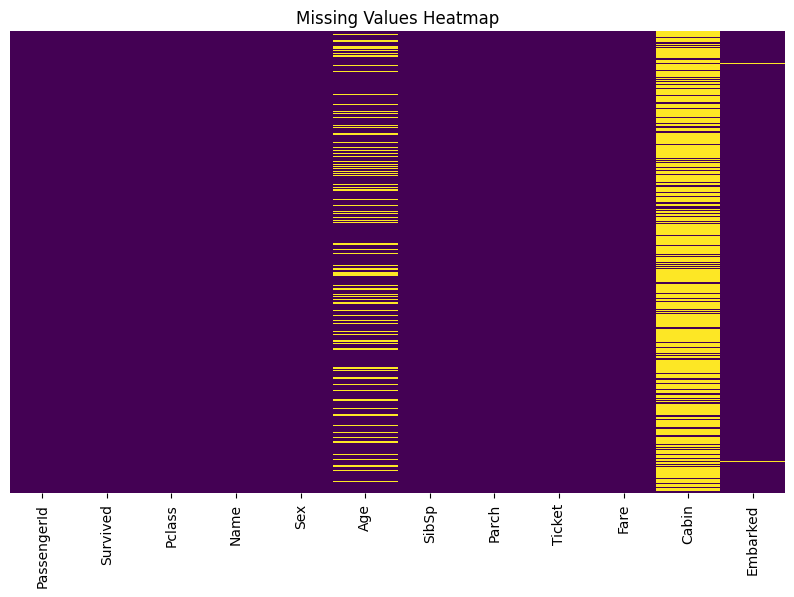

In [7]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(train_data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [8]:
# Handling missing values

# 1. Age: Fill missing values with the median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

# 2. Cabin: Drop the column
train_data.drop('Cabin', axis=1, inplace=True)

# 3. Embarked: Fill missing values with the most common value
most_common_embarked = train_data['Embarked'].mode()[0]
train_data['Embarked'].fillna(most_common_embarked, inplace=True)

# Verify if missing values are handled
missing_values_after_handling = train_data.isnull().sum()
print("Missing Values after Handling:\n", missing_values_after_handling)

Missing Values after Handling:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [9]:
# Calculate the percentage of people who survived
survival_percentage = (train_data['Survived'].sum() / len(train_data)) * 100

# Print the result
print(f"Percentage of people who survived: {survival_percentage:.2f}%")


Percentage of people who survived: 38.38%


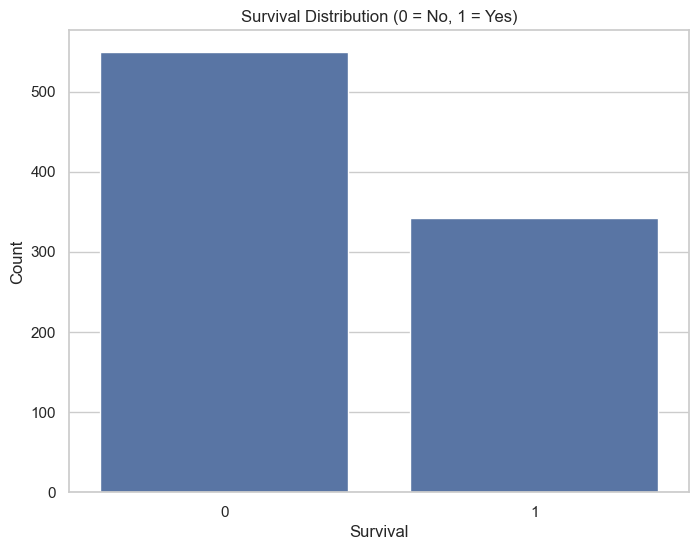

In [10]:
# Set the style for the plots
sns.set(style="whitegrid")

# Visualize survival rate
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Distribution (0 = No, 1 = Yes)')
plt.xlabel('Survival')
plt.ylabel('Count')
plt.show()


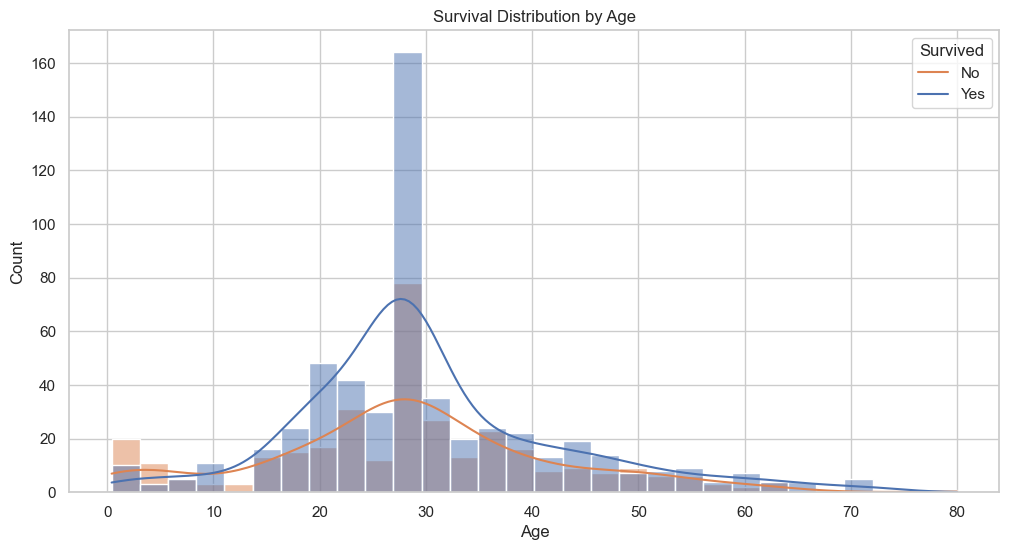

In [11]:
# Visualize survival rate by age
plt.figure(figsize=(12, 6))
sns.histplot(x='Age', hue='Survived', data=train_data, kde=True) #using Kernel Density Estimation
plt.title('Survival Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


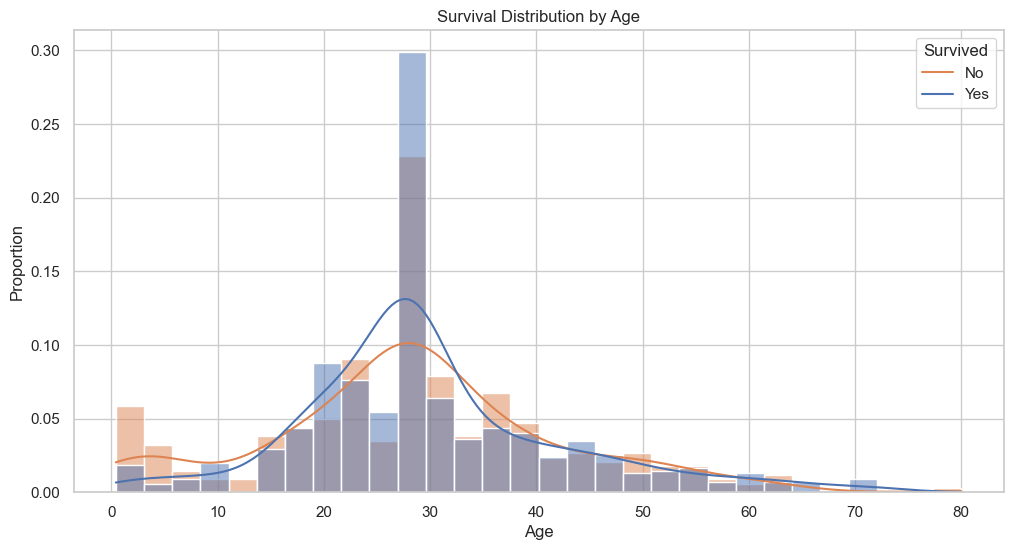

In [12]:
# Visualize survival rate by age
plt.figure(figsize=(12, 6))
sns.histplot(x='Age', hue='Survived', data=train_data, kde=True, stat='probability', common_norm=False)
plt.title('Survival Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

C:\Users\deepa\AppData\Local\Temp\ipykernel_17336\1115855108.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=train_data, ci=None)


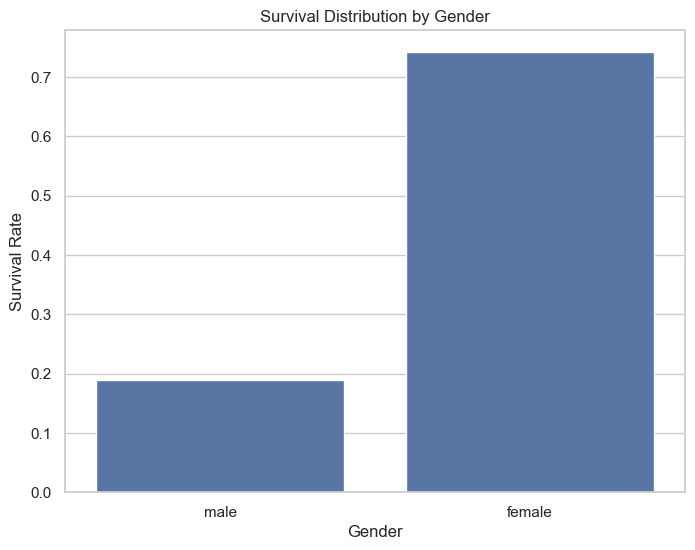

In [13]:
# Visualize survival rate by gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=train_data, ci=None)
plt.title('Survival Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()


In [14]:
train_data_copy = train_data.copy()

In [15]:
train_data_copy['Survived'] = train_data_copy['Survived'].astype(str)

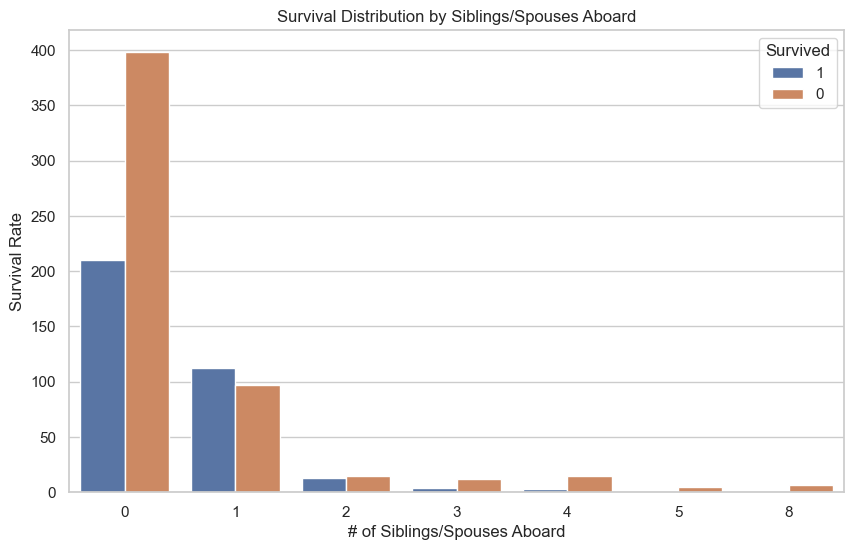

In [16]:
# Visualize survival rate by number of siblings/spouses
plt.figure(figsize=(10, 6))
sns.countplot(x='SibSp', hue='Survived', data=train_data_copy)
plt.title('Survival Distribution by Siblings/Spouses Aboard')
plt.xlabel('# of Siblings/Spouses Aboard')
plt.ylabel('Survival Rate')
plt.show()


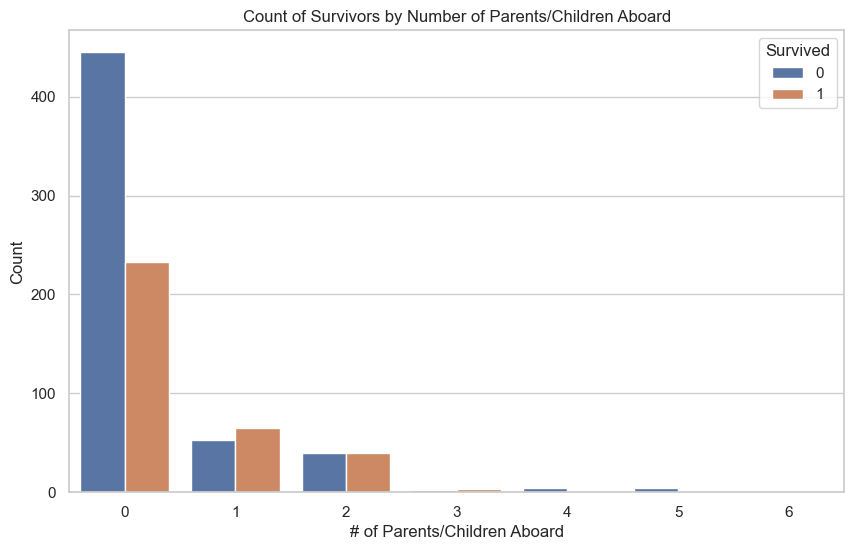

In [17]:
# Explore Demographic Characteristics
plt.figure(figsize=(10, 6))
sns.countplot(x='Parch', hue='Survived', data=train_data_copy)
plt.title('Count of Survivors by Number of Parents/Children Aboard')
plt.xlabel('# of Parents/Children Aboard')
plt.ylabel('Count')
plt.show()

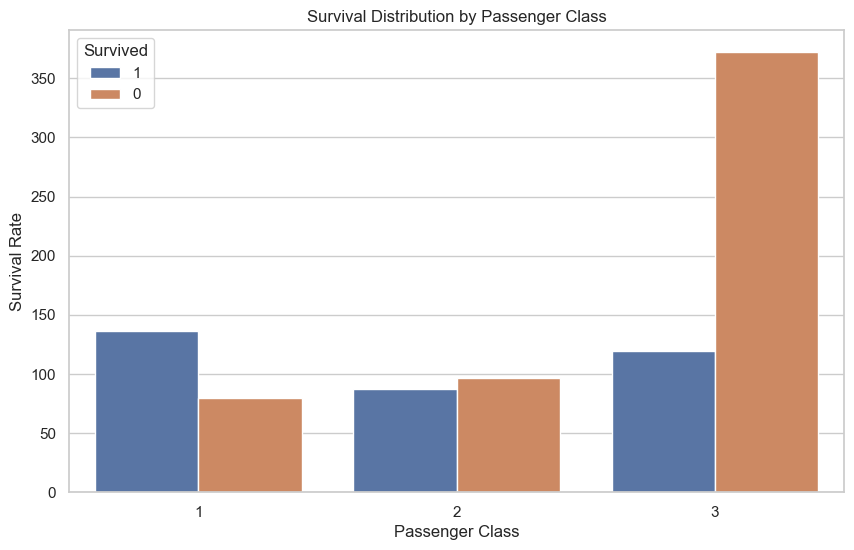

In [18]:
# Visualize survival rate by passenger class
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=train_data_copy)
plt.title('Survival Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


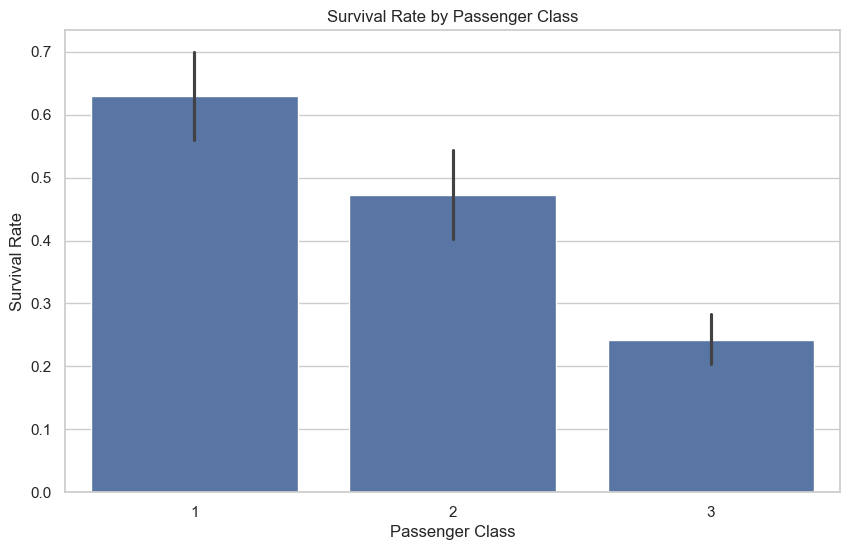

In [19]:
# Convert 'Survived' column to numeric
train_data['Survived'] = train_data['Survived'].astype(int)

# Visualize survival rate (proportion) by passenger class
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


In [20]:
# Calculate average fare for survivors and non-survivors
average_fare = train_data.groupby('Survived')['Fare'].mean()

# Display the results
print("Average Fare for Non-Survivors:", average_fare[0])
print("Average Fare for Survivors:", average_fare[1])


Average Fare for Non-Survivors: 22.117886885245902
Average Fare for Survivors: 48.39540760233918


In [21]:
# Create a cross-tabulation of Embarked and Survived
embarked_survival = pd.crosstab(train_data['Embarked'], train_data['Survived'], margins=True, margins_name='Total')

# Plot the cross-tabulation
embarked_survival

Survived,0,1,Total
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,219,646
Total,549,342,891


Embarked: The port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).
Survived: A binary variable indicating whether a passenger survived (1) or not (0).

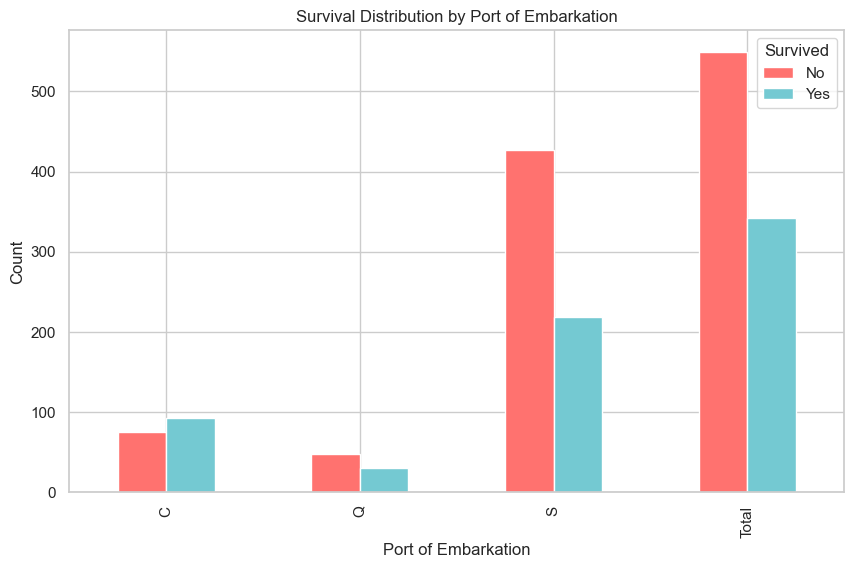

In [22]:
embarked_survival.drop('Total', axis=1, inplace=True)  # Remove the 'Total' column for a clearer plot

# Plot a grouped bar plot
embarked_survival.plot(kind='bar', color=['#FF726F', '#74C9D2'], figsize=(10, 6))
plt.title('Survival Distribution by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [23]:
# Calculate survival rate (percentage) for each combination of "Embarked" and "Survived"
embarked_survival_rate = pd.crosstab(index=train_data['Embarked'], columns=train_data['Survived'], normalize='index') * 100

# Display the table
embarked_survival_rate


Survived,0,1
Embarked,,
C,44.642857,55.357143
Q,61.038961,38.961039
S,66.099071,33.900929


In [50]:
# Load test data
test_data = pd.read_csv('test.csv')


In [25]:
train_data = train_data.drop(['Name'], axis=1)

In [26]:
train_data = train_data.drop(['PassengerId', 'Ticket'], axis=1)

In [27]:
# Perform one-hot encoding on categorical columns
train_data = pd.get_dummies(train_data, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)

In [29]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns
numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']
# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the training data
train_data[numerical_cols] = scaler.fit_transform(train_data[numerical_cols])

In [30]:
# Split the data into features (X) and target (y)
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


In [32]:
param_grid = {
    'RandomForest': {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'GradientBoosting': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'gamma': [0.01, 0.1, 1],
        'kernel': ['linear', 'rbf']
    }
}


### Hyperparameters Explanation:

#### Random Forest:
- **n_estimators:** The number of trees in the forest.
- **max_depth:** The maximum depth of the tree.
- **min_samples_split:** The minimum number of samples required to split an internal node.
- **min_samples_leaf:** The minimum number of samples required to be at a leaf node.

#### Gradient Boosting:
- **n_estimators:** The number of boosting stages to be run.
- **learning_rate:** The step size shrinkage to prevent overfitting. Lower values make the algorithm more robust.
- **max_depth:** The maximum depth of the individual trees.
- **min_samples_split:** The minimum number of samples required to split an internal node.
- **min_samples_leaf:** The minimum number of samples required to be at a leaf node.

#### Support Vector Machine (SVM):
- **C:** Regularization parameter. The strength of the regularization is inversely proportional to `C`.
- **gamma:** Kernel coefficient for 'rbf' and 'poly'. Higher values lead to more complex decision boundaries.
- **kernel:** Specifies the kernel type to be used in the algorithm. 'linear' is a linear kernel, and 'rbf' is a radial basis function kernel.

Adjusting these hyperparameters allows us to fine-tune the performance of the machine learning models. Grid search involves exploring all possible combinations of these hyperparameter values within the specified ranges to find the combination that produces the best results.


In [33]:
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svm = SVC()


In [34]:
grid_rf = GridSearchCV(rf, param_grid['RandomForest'], cv=5)
grid_rf.fit(X_train, y_train)

grid_gb = GridSearchCV(gb, param_grid['GradientBoosting'], cv=5)
grid_gb.fit(X_train, y_train)

grid_svm = GridSearchCV(svm, param_grid['SVM'], cv=5)
grid_svm.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']})

In [35]:
print("Random Forest - Best parameters:", grid_rf.best_params_)
print("Random Forest - Best accuracy:", grid_rf.best_score_)

print("Gradient Boosting - Best parameters:", grid_gb.best_params_)
print("Gradient Boosting - Best accuracy:", grid_gb.best_score_)

print("SVM - Best parameters:", grid_svm.best_params_)
print("SVM - Best accuracy:", grid_svm.best_score_)


Random Forest - Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Random Forest - Best accuracy: 0.832837584950261
Gradient Boosting - Best parameters: {'learning_rate': 0.01, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Gradient Boosting - Best accuracy: 0.8272530286614794
SVM - Best parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVM - Best accuracy: 0.8174135723431497


In [43]:
best_rf_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42  # You can set a random seed for reproducibility
)

In [44]:
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5, n_estimators=50,
                       random_state=42)

In [45]:
y_pred = best_rf_model.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8491620111731844


In [51]:
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)
# 2. Cabin: Drop the column
test_data.drop('Cabin', axis=1, inplace=True)

# 3. Embarked: Fill missing values with the most common value
most_common_embarked_test = test_data['Embarked'].mode()[0]
test_data['Embarked'].fillna(most_common_embarked_test, inplace=True)
test_data = test_data.drop(['Name','PassengerId', 'Ticket'], axis=1)
test_data = pd.get_dummies(test_data, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)
test_data[numerical_cols] = scaler.fit_transform(test_data[numerical_cols])

In [52]:
new_prediciton = best_rf_model.predict(test_data)

In [55]:
test_data['Survived_prediciton'] = new_prediciton
test_data

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Survived_prediciton
0,0.452723,0.000,0.000000,0.015282,False,True,True,True,False,0
1,0.617566,0.125,0.000000,0.013663,False,True,False,False,True,0
2,0.815377,0.000,0.000000,0.018909,True,False,True,True,False,0
3,0.353818,0.000,0.000000,0.016908,False,True,True,False,True,0
4,0.287881,0.125,0.111111,0.023984,False,True,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...
413,0.353818,0.000,0.000000,0.015713,False,True,True,False,True,0
414,0.512066,0.000,0.000000,0.212559,False,False,False,False,False,1
415,0.505473,0.000,0.000000,0.014151,False,True,True,False,True,0
416,0.353818,0.000,0.000000,0.015713,False,True,True,False,True,0


In [58]:
test_data[test_data['Survived_prediciton'] == 1]

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Survived_prediciton
6,0.393380,0.000,0.000000,0.014891,False,True,False,True,False,1
8,0.235131,0.000,0.000000,0.014110,False,True,False,False,False,1
12,0.301068,0.125,0.000000,0.160574,False,False,False,False,True,1
14,0.617566,0.125,0.000000,0.119406,False,False,False,False,True,1
15,0.314256,0.125,0.000000,0.054107,True,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...
408,0.353818,0.000,0.000000,0.015070,False,True,False,True,False,1
409,0.037320,0.125,0.111111,0.026887,False,True,False,False,True,1
410,0.353818,0.000,0.000000,0.015127,False,True,False,True,False,1
411,0.485692,0.125,0.000000,0.175668,False,False,False,True,False,1
